<IPython.core.display.Javascript object>


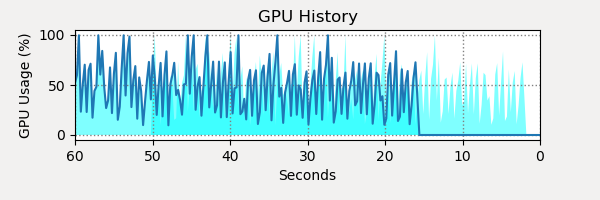

In [2]:
import sys
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from collections import deque
%matplotlib notebook
from IPython import display

gpuLoadFile="/sys/devices/gpu.0/load"


fig = plt.figure(figsize=(6,2))
plt.subplots_adjust(top=0.85, bottom=0.30)
fig.set_facecolor('#F2F1F0')
fig.canvas.set_window_title('GPU Activity Monitor')

gpuAx = plt.subplot2grid((1,1), (0,0), rowspan=2, colspan=1)

gpuLine, = gpuAx.plot([],[])

gpuy_list = deque([0]*240)
gpux_list = deque(np.linspace(60,0,num=240))

fill_lines=0
def initGraph():
    global gpuAx
    global gpuLine
    global fill_lines


    gpuAx.set_xlim(60, 0)
    gpuAx.set_ylim(-5, 105)
    gpuAx.set_title('GPU History')
    gpuAx.set_ylabel('GPU Usage (%)')
    gpuAx.set_xlabel('Seconds');
    gpuAx.grid(color='gray', linestyle='dotted', linewidth=1)

    gpuLine.set_data([],[])
    fill_lines=gpuAx.fill_between(gpuLine.get_xdata(),50,0)

    return [gpuLine] + [fill_lines]

def updateGraph(frame):
    global fill_lines
    global gpuy_list
    global gpux_list
    global gpuLine
    global gpuAx

 
    # Now draw the GPU usage
    gpuy_list.popleft()
    with open(gpuLoadFile, 'r') as gpuFile:
      fileData = gpuFile.read()
    # The GPU load is stored as a percentage * 10, e.g 256 = 25.6%
    gpuy_list.append(int(fileData)/10)
    gpuLine.set_data(gpux_list,gpuy_list)
    fill_lines.remove()
    fill_lines=gpuAx.fill_between(gpux_list,0,gpuy_list, facecolor='cyan', alpha=0.50)

    return [gpuLine] + [fill_lines]

animation = FuncAnimation(fig, updateGraph, frames=200,
                    init_func=initGraph,  interval=250, blit=True)

plt.show()
